In [3]:
import pandas as pd

df = pd.read_csv('https://stepik.org/media/attachments/lesson/779916/3_1_2.csv')

# В столбце true_final_ride_cost записаны правильные ответы.
# Создайте столбец final_ride_cost исходя из условий задачи.

# Корректность своего ответа можно проверить, например, таким образом

In [5]:
def calculate_final_cost(x):
    if x['rating'] > 6 and x['speed_max'] < 120:
        return int(x['ride_cost'] * 0.95)
    
    return int(x['ride_cost'] * 1.05)
    
df['final_ride_cost'] = df.apply(calculate_final_cost, axis=1)

In [7]:
print(df['final_ride_cost'].equals(df['true_final_ride_cost']))

True


In [5]:
import pandas as pd

df = pd.read_csv('https://stepik.org/media/attachments/lesson/779916/3_1_3.csv')
ans = pd.read_csv('https://stepik.org/media/attachments/lesson/779916/3_1_3_ans.csv')

In [8]:
second_speed_max = lambda x: x.nlargest(2).iloc[-1]
min_max_rate = lambda x: min(x) / max(x)
popular_stop_times = lambda x: x.mode()
result = df.groupby('car_id', as_index=False).agg(feature_1=('stop_times', 'nunique'),
                                                  feature_2=('speed_max', second_speed_max),
                                                  feature_3=('rating', min_max_rate),
                                                  feature_4=('stop_times', popular_stop_times),
                                                  feature_5=('ride_cost', 'std'))

In [9]:
result

,car_id,feature_1,feature_2,feature_3,feature_4,feature_5
0,G-1056464Y,5,96.000000,0.299279,1,125833.828153
1,M15952724y,4,151.000000,0.054645,0,26887.711194
2,M50269450O,8,115.597945,0.241451,0,136560.952417
3,Z16920973J,4,94.167306,0.216853,0,65036.154948
4,q-1127410X,3,137.914456,0.110429,0,90794.737314
5,z-2033330g,4,120.153166,0.011820,0,460.271690
6,z48466812V,4,139.000000,0.085864,0,16101.650675


In [3]:
import pandas as pd

rides = pd.read_csv('https://stepik.org/media/attachments/lesson/779916/3_1_4_rides.csv')
cars = pd.read_csv('https://stepik.org/media/attachments/lesson/779916/3_1_4_cars.csv')

# В переменную ans записан правильный ответ, с которым можно сверить свое решение.
ans = pd.read_csv('https://stepik.org/media/attachments/lesson/779916/3_1_4_ans.csv')

In [8]:
result = rides.merge(cars[['car_id', 'target_class']], on='car_id', how='inner')
result

,car_id,ride_id,rating,ride_duration,ride_cost,target_class
0,L-1156474z,u1g,5.81,33,391,break_bug
1,M20797256F,e1V,5.01,56,667,engine_overheat
2,E16896376o,B1Q,4.88,26,228,engine_overheat
3,E16896376o,V1L,6.98,37,512,engine_overheat
4,X10754765V,M1i,1.62,29,312,electro_bug
5,s-1723833v,I1q,3.94,63,813,engine_check


In [9]:
ans

,car_id,ride_id,rating,ride_duration,ride_cost,target_class
0,L-1156474z,u1g,5.81,33,391,break_bug
1,M20797256F,e1V,5.01,56,667,engine_overheat
2,E16896376o,B1Q,4.88,26,228,engine_overheat
3,X10754765V,M1i,1.62,29,312,electro_bug
4,E16896376o,V1L,6.98,37,512,engine_overheat
5,s-1723833v,I1q,3.94,63,813,engine_check


In [25]:
import pandas as pd

df = pd.read_csv('https://stepik.org/media/attachments/lesson/779916/3_1_5.csv')

# В столбцах true_car_ride_count, true_user_rating_max, true_user_ride_cost_mean записаны правильные ответы.
# Создайте столбцы car_ride_count, user_rating_max, user_ride_cost_mean

# Проверить корректность своего решения можно, например, таким способом
# print(df['true_car_ride_count'].equals(df['car_ride_count']))
# print(df['true_user_rating_max'].equals(df['user_rating_max']))
# print(df['true_user_ride_cost_mean'].equals(df['user_ride_cost_mean']))

In [26]:
df

,car_id,ride_id,user_id,rating,ride_cost,true_car_ride_count,true_user_rating_max,true_user_ride_cost_mean
0,D17587481H,E1V,Q20675647n,1.96,282,3,1.96,282.0
1,w13176062d,V1h,O11803938a,4.45,308,4,4.45,308.0
2,s-2202835E,B1g,u20234217o,2.76,525,4,2.76,525.0
3,H-1213278K,i1U,c19828320U,7.12,6154,5,7.12,6154.0
4,H-2108091L,j1Z,l90945335K,1.68,539,4,1.68,539.0
...,...,...,...,...,...,...,...,...
95,I-1538597J,E1u,s62773754W,9.80,115,2,9.80,115.0
96,g21645452f,r1J,a28773047v,4.26,387,3,4.26,387.0
97,s20690018N,z1A,m35202170I,2.75,155,2,2.75,155.0
98,v11386552i,z1v,b62669559O,0.88,123261,2,0.88,123261.0


In [27]:
df['car_ride_count'] = df.groupby('car_id', as_index=False)['ride_id'].transform('count')
df['user_rating_max'] = df.groupby('user_id', as_index=False)['rating'].transform('max')
df['user_ride_cost_mean'] = df.groupby('user_id', as_index=False)['ride_cost'].transform('mean')
result = df
result

,car_id,ride_id,user_id,rating,ride_cost,true_car_ride_count,true_user_rating_max,true_user_ride_cost_mean,car_ride_count,user_rating_max,user_ride_cost_mean
0,D17587481H,E1V,Q20675647n,1.96,282,3,1.96,282.0,3,1.96,282.0
1,w13176062d,V1h,O11803938a,4.45,308,4,4.45,308.0,4,4.45,308.0
2,s-2202835E,B1g,u20234217o,2.76,525,4,2.76,525.0,4,2.76,525.0
3,H-1213278K,i1U,c19828320U,7.12,6154,5,7.12,6154.0,5,7.12,6154.0
4,H-2108091L,j1Z,l90945335K,1.68,539,4,1.68,539.0,4,1.68,539.0
...,...,...,...,...,...,...,...,...,...,...,...
95,I-1538597J,E1u,s62773754W,9.80,115,2,9.80,115.0,2,9.80,115.0
96,g21645452f,r1J,a28773047v,4.26,387,3,4.26,387.0,3,4.26,387.0
97,s20690018N,z1A,m35202170I,2.75,155,2,2.75,155.0,2,2.75,155.0
98,v11386552i,z1v,b62669559O,0.88,123261,2,0.88,123261.0,2,0.88,123261.0


In [28]:
print(df['true_car_ride_count'].equals(df['car_ride_count']))
print(df['true_user_rating_max'].equals(df['user_rating_max']))
print(df['true_user_ride_cost_mean'].equals(df['user_ride_cost_mean']))

True
True
True


In [29]:
import pandas as pd

df = pd.read_csv('https://stepik.org/media/attachments/lesson/779916/3_1_6.csv')

In [67]:
df['feature_1'] = df.groupby('user_id', as_index=False)['ride_cost'].transform(lambda x: x.quantile(0.75))
df['feature_2'] = df.groupby('user_id', as_index=False)['rating'].transform(lambda x: (x.max() - x.min()) / x.mean())
df['feature_3'] = df.groupby('car_id', as_index=False)['ride_duration'].transform(lambda x: sum(x > 40))
df['feature_4'] = df.groupby('car_id', as_index=False)['ride_duration'].transform(lambda x: sum(x[x > 40]))

In [68]:
df

,car_id,ride_id,user_id,rating,ride_duration,ride_cost,true_feature_1,true_feature_2,true_feature_3,true_feature_4,feature_1,feature_2,feature_3,feature_4
0,v13590850L,m1q,S54951221d,1.38,52,723,599.25,1.043328,1,52,599.25,1.043328,1,52
1,C-1092574s,q1w,h90416721m,8.36,33572,470001,470001.00,0.000000,6,100329,470001.00,0.000000,6,100329
2,i77678921h,i1i,A15424124M,7.03,49,385,385.00,0.000000,3,169,385.00,0.000000,3,169
3,U16614632F,p1m,Q22613814X,6.87,43,510,510.00,0.000000,5,320,510.00,0.000000,5,320
4,i55328849i,I1A,N22883211D,4.30,110,1536,1536.00,0.000000,10,23108,1536.00,0.000000,10,23108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,j22108372p,V1J,V75566459d,4.00,23958,239574,179724.50,0.102497,1,23958,179724.50,0.102497,1,23958
96,B-3513567K,W1b,q20149942o,0.10,39,1946,1946.00,0.000000,4,17106,1946.00,0.000000,4,17106
97,u20627445L,e1z,b61297238i,0.65,25,293,836.00,1.875283,0,0,836.00,1.875283,0,0
98,U16614632F,n1g,r18895845t,5.20,59,525,525.00,0.000000,5,320,525.00,0.000000,5,320


In [1]:
import pandas as pd

df = pd.read_csv('https://stepik.org/media/attachments/lesson/779916/3_1_7.csv')

# В ans записан правильный ответ
ans = pd.read_csv('https://stepik.org/media/attachments/lesson/779916/3_1_7_ans.csv')

In [49]:
table_1 = df.pivot_table(index='user_id', columns=['car_type'], values=['car_id'], aggfunc=['count']).fillna(0)
table_1.columns = [f'{i[2]}_{i[0]}' for i in table_1.columns]
table_1.reset_index(inplace=True)

table_2 = df.pivot_table(index='user_id', values=['distance', 'ride_cost'], aggfunc=['max', 'min', 'mean']).fillna(0)
table_2.columns = [f'{i[1]}_{i[0]}' for i in table_2.columns]
table_2.reset_index(inplace=True)

table_3 = df.pivot_table(index='user_id', values=['car_id'], aggfunc=['nunique']).fillna(0)
table_3.columns = [f'{i[1]}_{i[0]}' for i in table_3.columns]
table_3.reset_index(inplace=True)

result = table_1.merge(table_2, on='user_id', how='inner')
result = result.merge(table_3, on='user_id', how='inner')

max_speed_table = df.pivot_table(index='user_id', values=['speed_max'], aggfunc=['max']).fillna(0)
max_speed_table.columns = [f'{i[1]}' for i in max_speed_table.columns]
max_speed_table.reset_index(inplace=True)
result['crazy_driver'] = max_speed_table['speed_max'].apply(lambda x: 1 if x > 100 else 0)

,user_id,economy_count,standart_count,distance_max,ride_cost_max,distance_min,ride_cost_min,distance_mean,ride_cost_mean,car_id_nunique,crazy_driver
0,A11173530w,1.0,0.0,2.967598e+03,614,2.967598e+03,614,2.967598e+03,614,1,1
1,A66187474K,0.0,1.0,4.621773e+03,1320,4.621773e+03,1320,4.621773e+03,1320,1,0
2,C84438702e,1.0,0.0,1.221070e+03,195,1.221070e+03,195,1.221070e+03,195,1,1
3,E15036556k,0.0,1.0,1.284249e+06,374394,1.284249e+06,374394,1.284249e+06,374394,1,0
4,G84350611k,0.0,1.0,1.850353e+03,428,1.850353e+03,428,1.850353e+03,428,1,0
5,I12505308H,0.0,1.0,1.023812e+03,509,1.023812e+03,509,1.023812e+03,509,1,0
6,N78592053P,1.0,0.0,1.591183e+03,746,1.591183e+03,746,1.591183e+03,746,1,0
7,O16691347p,1.0,0.0,2.295234e+02,202,2.295234e+02,202,2.295234e+02,202,1,0
8,P16628111o,0.0,1.0,1.104886e+03,1148,1.104886e+03,1148,1.104886e+03,1148,1,0
9,R16443619c,1.0,0.0,1.324071e+03,512,1.324071e+03,512,1.324071e+03,512,1,0


In [50]:
ans

,user_id,economy_count,standart_count,distance_min,ride_cost_min,distance_max,ride_cost_max,distance_mean,ride_cost_mean,car_id_nunique,crazy_driver
0,A11173530w,1.0,0.0,2.967598e+03,614,2.967598e+03,614,2.967598e+03,614,1,1
1,A66187474K,0.0,1.0,4.621773e+03,1320,4.621773e+03,1320,4.621773e+03,1320,1,0
2,C84438702e,1.0,0.0,1.221070e+03,195,1.221070e+03,195,1.221070e+03,195,1,1
3,E15036556k,0.0,1.0,1.284249e+06,374394,1.284249e+06,374394,1.284249e+06,374394,1,0
4,G84350611k,0.0,1.0,1.850353e+03,428,1.850353e+03,428,1.850353e+03,428,1,0
5,I12505308H,0.0,1.0,1.023812e+03,509,1.023812e+03,509,1.023812e+03,509,1,0
6,N78592053P,1.0,0.0,1.591183e+03,746,1.591183e+03,746,1.591183e+03,746,1,0
7,O16691347p,1.0,0.0,2.295234e+02,202,2.295234e+02,202,2.295234e+02,202,1,0
8,P16628111o,0.0,1.0,1.104886e+03,1148,1.104886e+03,1148,1.104886e+03,1148,1,0
9,R16443619c,1.0,0.0,1.324071e+03,512,1.324071e+03,512,1.324071e+03,512,1,0


In [74]:
import pandas as pd
import seaborn as sns


path = 'https://stepik.org/media/attachments/lesson/779914/make_it_easy.csv'
df = pd.read_csv(path)
df.sample(4)

,feature_1,feature_2,feature_3,label
761,0.50,1.94,17,A
436,-0.86,-2.35,16,B
7,2.49,0.17,68,B
193,-0.88,2.34,30,B


In [89]:
df['killer_feature'] = df['feature_1']**2 + df['feature_2']**2
df

,feature_1,feature_2,feature_3,label,killer_feature
0,2.5,0.00,58,B,6.2500
1,2.5,0.02,61,B,6.2504
2,2.5,0.05,33,B,6.2525
3,2.5,0.07,89,B,6.2549
4,2.5,0.10,58,B,6.2600
...,...,...,...,...,...
1253,2.0,-0.09,30,A,4.0081
1254,2.0,-0.07,41,A,4.0049
1255,2.0,-0.05,30,A,4.0025
1256,2.0,-0.03,3,A,4.0009


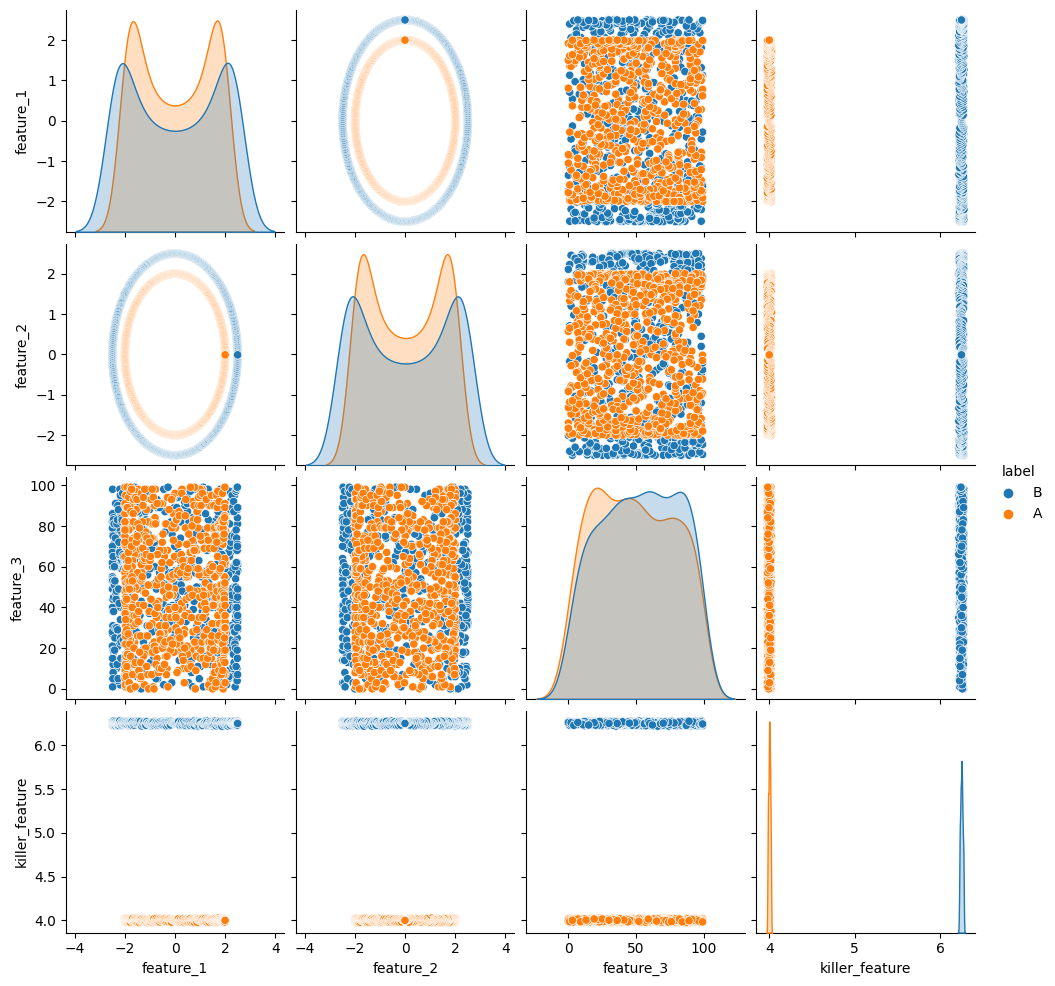

In [90]:
sns.pairplot(df, hue='label');

In [56]:
df.describe()

,feature_1,feature_2,feature_3
count,1258.000000,1258.000000,1258.000000
mean,0.002432,-0.000199,50.675676
std,1.602289,1.600537,28.462619
min,-2.500000,-2.500000,0.000000
25%,-1.560000,-1.560000,26.000000
50%,0.000000,0.000000,50.000000
75%,1.567500,1.560000,75.750000
max,2.500000,2.500000,99.000000


In [33]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://stepik.org/media/attachments/lesson/779914/make_gold_features_example.csv')

In [2]:
df

,deviation_normal,ride_date,car_id,value,diff_value
0,0,01-01,G115,-1.5,0.0
1,-5,01-02,G115,-6.0,0.0
2,-6,01-03,G115,-6.0,0.0
3,-4,01-04,G115,-4.5,0.0
4,-5,01-05,G115,-3.5,0.0
...,...,...,...,...,...
455,-11,03-28,d-21,-11.0,0.0
456,-11,03-29,d-21,-11.5,0.0
457,-12,03-30,d-21,-12.0,0.0
458,-12,03-31,d-21,-12.0,0.0


In [41]:
# result = df.groupby(['car_id'], as_index=False).agg(gold_feature_1=('deviation_normal', 'max'))
# result

# def find_difference(x):
#     return x['mean_deviation_normal'] - x['mean_deviation_normal']

# result = df.groupby(['car_id', 'ride_date'], as_index=False).agg(mean_deviation_normal=('deviation_normal', 'mean'))
# result['diff_value'] = result.groupby(['car_id'], as_index=False)['mean_deviation_normal'].transform(pd.Series.diff)
# result = result.groupby(['car_id'], as_index=False).agg(gold_feature_1=('diff_value', 'max'))
# result

import numpy as np

result = df.groupby(['car_id', 'ride_date'], as_index=False).agg(mean_deviation_normal=('deviation_normal', 'mean'))
result["diff_value"] = result.groupby("car_id", as_index=False)["mean_deviation_normal"].transform(pd.Series.diff)
result = result.groupby(['car_id'], as_index=False).agg(gold_feature_1=('diff_value', 'max'), gold_feature_2=('diff_value', np.argmax))
result['gold_feature_2'] = result['gold_feature_2'].apply(lambda x: x if x >= 5 else 0)
result

,car_id,gold_feature_1,gold_feature_2
0,G-29,11.0,50
1,G115,52.0,49
2,M-30,8.0,51
3,b468,0.0,0
4,d-21,0.0,0


In [19]:
df.describe()

,deviation_normal,value,diff_value
count,460.000000,460.000000,460.000000
mean,5.445652,5.418478,0.270652
std,16.197558,16.245710,2.615337
min,-31.000000,-31.000000,0.000000
25%,-4.000000,-4.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,10.000000,9.625000,0.000000
max,50.000000,48.500000,52.000000


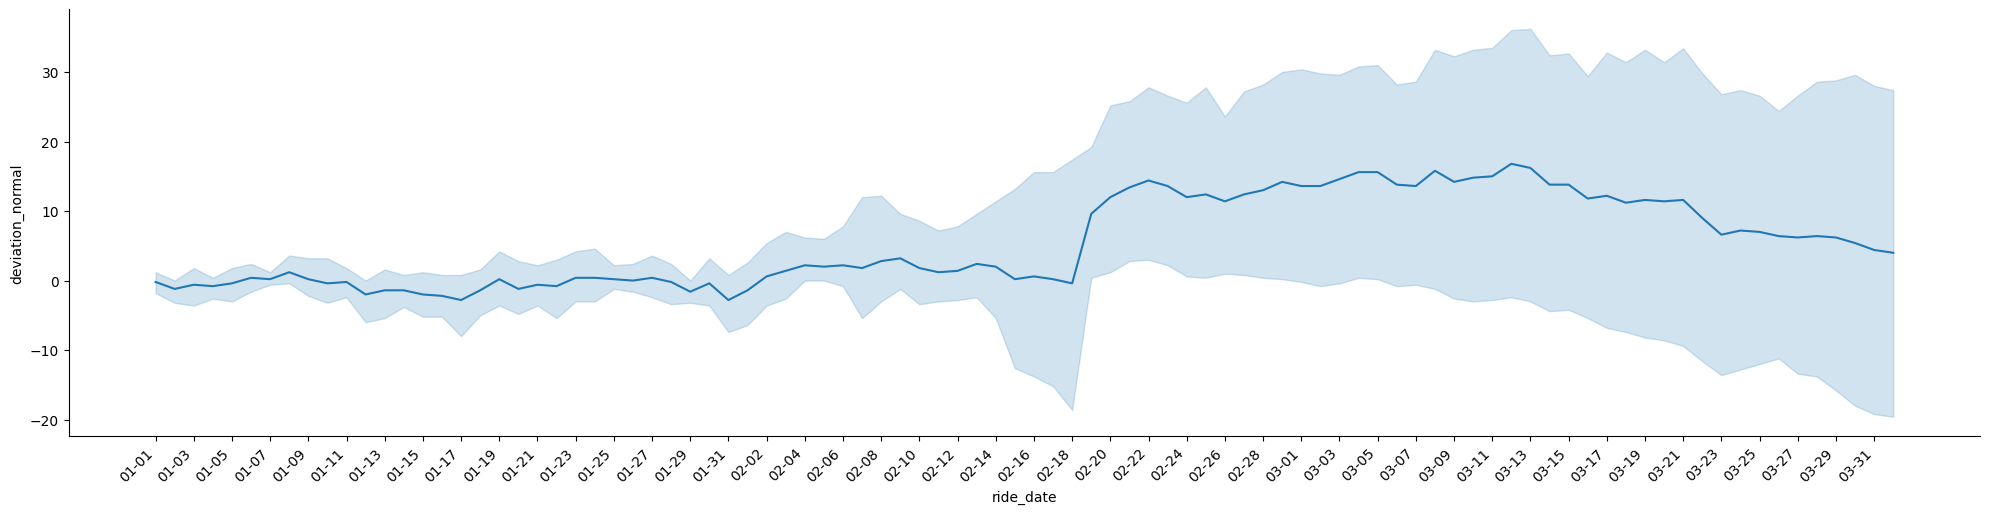

In [9]:
g = sns.relplot(
    data=df,
    x="ride_date",
    y="deviation_normal",
    kind="line",  # или scatter
    aspect=4,
)

g.set_xticklabels(rotation=45, horizontalalignment="right", step=2);

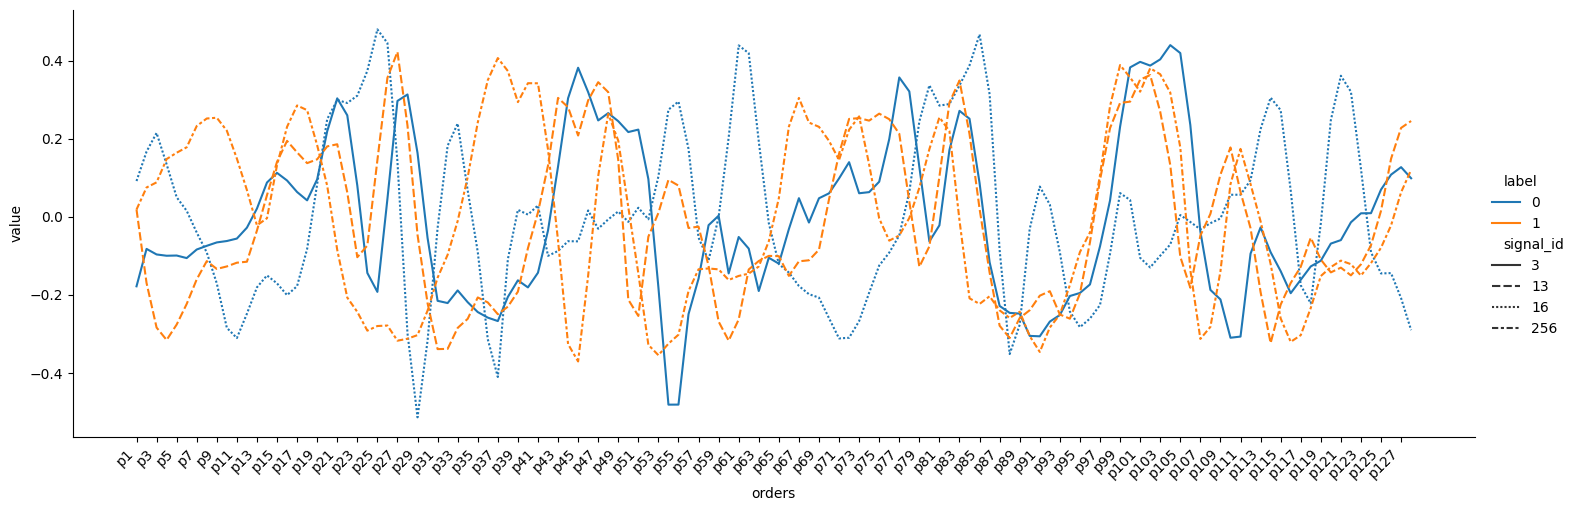

In [116]:
import pandas as pd
import seaborn as sns
import numpy as np

path = 'https://stepik.org/media/attachments/lesson/779914/fen_train.csv'
train = pd.read_csv(path)

# Переводим датасет в long формат
df_melt = train.melt(
    id_vars="signal_id",
    value_vars=[f"p{i}" for i in range(1, 128 + 1)],
    var_name="orders",
    value_name="value",
).merge(train[["signal_id", "label"]], on="signal_id", how="left")

# Отбираем несколько примеров разных классов
tmp = df_melt[df_melt.signal_id.isin([3, 13, 16, 256])]

# Строим графику
sns.relplot(
    data=tmp,
    x="orders",
    y="value",
    hue="label",
    style="signal_id",
    kind="line",
    aspect=3,
).set_xticklabels(rotation=45, horizontalalignment="right", step=2);

In [117]:
threshold_zero_diff = 0.05
train_diff = train.iloc[:, 1:129].diff(axis=1)
train['zero_diff_count'] = np.sum(np.abs(train_diff) < threshold_zero_diff, axis=1)
train['diff_variance'] = train_diff.var(axis=1)

In [118]:
best_accuracy = 0.0
best_zero_diff_count = 0
best_variance = 0.0

for zero_diff_count in np.arange(40, 60, 1):
    for variance in np.arange(0.005, 0.015, 0.001):
        train['label_pred'] = np.where((train['diff_variance'] < variance) & (train['zero_diff_count'] < zero_diff_count), 1, 0)
        accuracy = (train['label_pred'] == train['label']).mean()

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_zero_diff_count = zero_diff_count
            best_variance = variance

print("Best Accuracy:", best_accuracy)
print("Best Zero Diff Count:", best_zero_diff_count)
print("Best Variance:", best_variance)

Best Accuracy: 1.0
Best Zero Diff Count: 56
Best Variance: 0.012


In [119]:
test = pd.read_csv('https://stepik.org/media/attachments/lesson/779914/fen_test.csv')
test

,signal_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p119,p120,p121,p122,p123,p124,p125,p126,p127,p128
0,0,0.048383,0.075671,0.085861,0.087598,0.133466,0.239305,0.324572,0.264262,0.129173,...,0.138940,0.256082,0.344688,0.252258,0.034918,-0.141454,-0.132326,0.092708,0.290870,0.305827
1,1,0.092534,0.209535,0.390794,0.442508,0.429571,0.451524,0.310780,-0.075440,-0.297661,...,0.187563,0.234320,0.270503,0.328785,0.347625,0.426766,0.299061,-0.060183,-0.177051,-0.083738
2,8,0.045240,0.182892,0.293203,0.367133,0.341595,0.315698,0.343855,0.301613,0.243359,...,0.368040,0.290899,0.207095,0.242306,0.259203,0.210387,0.212587,0.076684,-0.203899,-0.346122
3,9,0.182414,-0.337581,-0.080484,0.393137,0.373783,0.112220,-0.219613,-0.355965,-0.302890,...,0.127023,0.275310,0.192306,0.073698,0.243584,0.276032,0.238793,0.275950,0.256591,0.360451
4,10,0.378236,0.137916,-0.063737,-0.201264,-0.067326,0.127712,0.221648,0.257548,0.093588,...,-0.202586,0.001186,0.190594,0.253443,0.168408,0.025194,-0.048555,-0.190483,-0.387497,-0.387843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,1216,-0.271647,-0.279556,-0.261024,-0.240678,-0.198738,-0.050845,0.187136,0.400810,0.466261,...,0.432804,0.430316,0.360257,0.128453,-0.081609,-0.308643,-0.311576,-0.065489,-0.087348,-0.105786
428,1217,0.437164,0.127592,-0.304225,-0.488055,-0.278895,-0.020672,0.125794,0.113607,-0.144910,...,0.460892,0.331173,-0.004532,-0.298237,-0.354807,-0.211790,-0.045861,0.074650,0.046221,-0.131905
429,1223,-0.133246,-0.132675,-0.155113,-0.079316,-0.035889,0.006239,0.001766,-0.040629,0.009979,...,-0.123037,-0.088129,-0.046241,-0.026337,0.024571,0.029573,0.044202,0.117704,0.276104,0.383572
430,1224,-0.126366,-0.189592,-0.112701,-0.136277,-0.137174,-0.033034,0.029840,0.017674,-0.019952,...,-0.038111,-0.028967,-0.025562,-0.046228,-0.069375,-0.064908,-0.053884,-0.005577,0.110611,0.214029


In [128]:
threshold_zero_diff = 0.05
test_diff = test.iloc[:, 1:129].diff(axis=1)
test['zero_diff_count'] = np.sum(np.abs(test_diff) < threshold_zero_diff, axis=1)
test['diff_variance'] = test_diff.var(axis=1)

best_zero_diff_count = 56
best_variance = 0.012

test['label'] = np.where((test['diff_variance'] < best_variance) & (test['zero_diff_count'] < best_zero_diff_count), 1, 0)
test_answers = test[['signal_id', 'label']] 

In [129]:
test_answers.to_csv('../models/signals_answers.csv', index=False)

<Axes: xlabel='diff_variance', ylabel='zero_diff_count'>

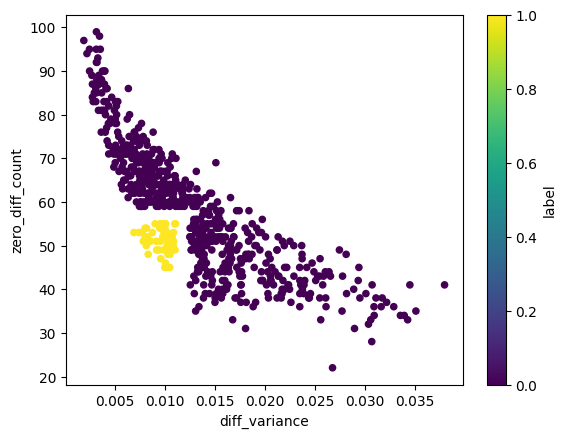

In [106]:
train.plot.scatter(x='diff_variance',
                   y='zero_diff_count',
                   c='label',
                   colormap='viridis')

In [101]:
train

,signal_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p122,p123,p124,p125,p126,p127,p128,label,zero_diff_count,diff_variance
0,3,-0.177789,-0.081874,-0.096131,-0.099436,-0.098867,-0.105427,-0.083472,-0.074000,-0.065275,...,-0.013739,0.009359,0.009645,0.070163,0.108443,0.127638,0.099169,0,70,0.010646
1,4,0.010337,0.010733,0.117607,0.259589,0.339589,0.329296,0.281260,0.115658,-0.172955,...,0.158927,-0.102145,-0.301141,-0.148649,0.263631,0.480440,0.420327,0,48,0.020320
2,5,-0.221846,-0.247773,-0.187847,-0.181616,-0.108799,-0.099480,-0.083244,-0.054944,-0.100919,...,-0.089625,-0.122950,-0.074273,-0.018595,0.054752,0.097544,0.067837,0,66,0.010246
3,6,0.411835,0.513823,0.558802,0.380244,0.210830,0.174093,0.102772,-0.051933,-0.237179,...,-0.112094,-0.133700,-0.024104,-0.042590,-0.062838,-0.078137,-0.194478,0,56,0.013071
4,7,0.221770,-0.026863,-0.249447,-0.340728,-0.288676,-0.207364,-0.155768,-0.091768,-0.119012,...,-0.077491,-0.115439,-0.126838,-0.087323,-0.115734,-0.102995,-0.098657,0,68,0.008025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,1214,0.411055,0.168638,-0.198538,-0.300685,0.056328,0.617390,0.722862,0.370691,-0.013178,...,-0.172304,-0.145502,-0.125380,-0.012973,0.055567,0.017957,0.104189,0,47,0.020489
650,1218,0.104295,0.109067,0.045116,-0.033823,-0.072836,-0.054253,-0.014003,0.027218,0.054011,...,-0.041478,-0.011162,-0.018928,-0.004817,0.032872,0.027806,0.033331,0,95,0.003109
651,1219,-0.104234,-0.085259,-0.043942,-0.030790,0.026148,0.028789,0.004455,0.058006,0.125277,...,-0.094226,-0.072689,-0.132456,-0.135855,-0.079241,-0.015215,0.021913,0,69,0.009395
652,1221,0.031189,0.051451,0.176866,0.262605,0.201261,0.132246,-0.044051,-0.280172,-0.340040,...,-0.134502,-0.112658,-0.045430,0.038033,0.091223,0.180421,0.522160,0,41,0.020126


In [81]:
df_melt

,signal_id,orders,value,label
0,3,p1,-0.177789,0
1,4,p1,0.010337,0
2,5,p1,-0.221846,0
3,6,p1,0.411835,0
4,7,p1,0.221770,0
...,...,...,...,...
83707,1214,p128,0.104189,0
83708,1218,p128,0.033331,0
83709,1219,p128,0.021913,0
83710,1221,p128,0.522160,0


In [78]:
df_melt['value_std'] = df_melt.groupby('signal_id', as_index=False)['value'].transform(lambda x: x.std())


df_melt['value_diff'] = df_melt.groupby('signal_id', as_index=False)['value'].transform(pd.Series.diff)
df_melt['value_diff'] = df_melt['value_diff'].apply(lambda x: x if abs(x) >= 0.05 else 0)
df_melt['value_diff_count'] = df_melt.groupby('signal_id', as_index=False)['value_diff'].transform(lambda x: (x==0).sum())
df_melt

,signal_id,orders,value,label,value_std,value_diff,value_diff_cout,value_diff_count
0,3,p1,-0.177789,0,0.201643,0.000000,71,71
1,4,p1,0.010337,0,0.239616,0.000000,49,49
2,5,p1,-0.221846,0,0.219042,0.000000,67,67
3,6,p1,0.411835,0,0.248920,0.000000,57,57
4,7,p1,0.221770,0,0.195233,0.000000,69,69
...,...,...,...,...,...,...,...,...
83707,1214,p128,0.104189,0,0.240128,0.086233,48,48
83708,1218,p128,0.033331,0,0.116683,0.000000,96,96
83709,1219,p128,0.021913,0,0.178475,0.000000,70,70
83710,1221,p128,0.522160,0,0.254165,0.341739,42,42


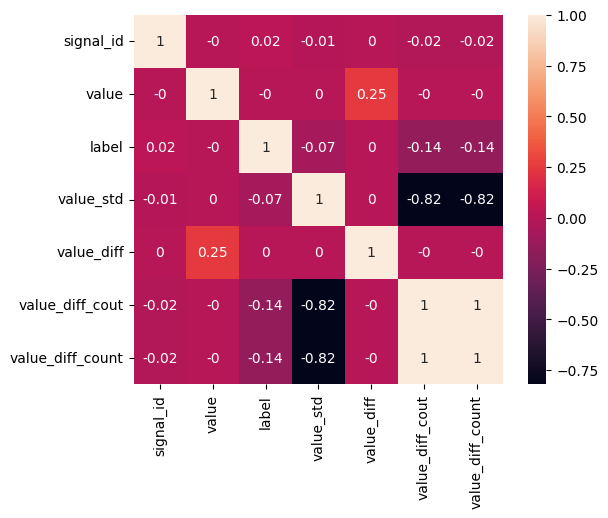

In [79]:
import seaborn as sns

sns.heatmap(
    data=df_melt.corr(numeric_only=True).round(2),
    square=True,
    annot=True,
);

<Axes: xlabel='value_diff', ylabel='value_std'>

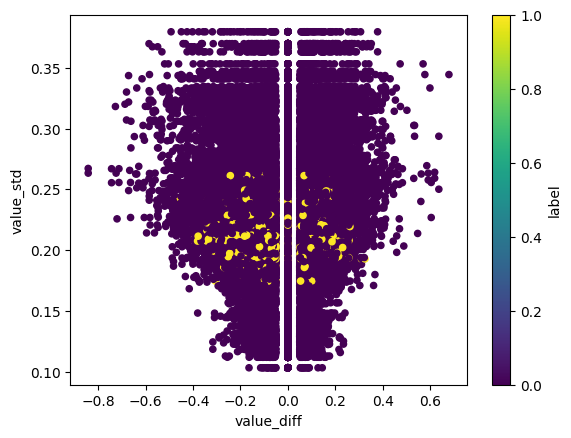

In [59]:
df_melt.plot.scatter(x='value_diff',
                     y='value_std',
                     c='label',
                     colormap='viridis')

In [8]:
train

,signal_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p120,p121,p122,p123,p124,p125,p126,p127,p128,label
0,3,-0.177789,-0.081874,-0.096131,-0.099436,-0.098867,-0.105427,-0.083472,-0.074000,-0.065275,...,-0.068265,-0.059327,-0.013739,0.009359,0.009645,0.070163,0.108443,0.127638,0.099169,0
1,4,0.010337,0.010733,0.117607,0.259589,0.339589,0.329296,0.281260,0.115658,-0.172955,...,0.370135,0.344097,0.158927,-0.102145,-0.301141,-0.148649,0.263631,0.480440,0.420327,0
2,5,-0.221846,-0.247773,-0.187847,-0.181616,-0.108799,-0.099480,-0.083244,-0.054944,-0.100919,...,-0.086089,-0.080394,-0.089625,-0.122950,-0.074273,-0.018595,0.054752,0.097544,0.067837,0
3,6,0.411835,0.513823,0.558802,0.380244,0.210830,0.174093,0.102772,-0.051933,-0.237179,...,0.113856,0.014483,-0.112094,-0.133700,-0.024104,-0.042590,-0.062838,-0.078137,-0.194478,0
4,7,0.221770,-0.026863,-0.249447,-0.340728,-0.288676,-0.207364,-0.155768,-0.091768,-0.119012,...,-0.216549,-0.167078,-0.077491,-0.115439,-0.126838,-0.087323,-0.115734,-0.102995,-0.098657,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,1214,0.411055,0.168638,-0.198538,-0.300685,0.056328,0.617390,0.722862,0.370691,-0.013178,...,-0.244818,-0.192781,-0.172304,-0.145502,-0.125380,-0.012973,0.055567,0.017957,0.104189,0
650,1218,0.104295,0.109067,0.045116,-0.033823,-0.072836,-0.054253,-0.014003,0.027218,0.054011,...,-0.016502,-0.022746,-0.041478,-0.011162,-0.018928,-0.004817,0.032872,0.027806,0.033331,0
651,1219,-0.104234,-0.085259,-0.043942,-0.030790,0.026148,0.028789,0.004455,0.058006,0.125277,...,-0.159490,-0.126357,-0.094226,-0.072689,-0.132456,-0.135855,-0.079241,-0.015215,0.021913,0
652,1221,0.031189,0.051451,0.176866,0.262605,0.201261,0.132246,-0.044051,-0.280172,-0.340040,...,-0.138272,-0.143904,-0.134502,-0.112658,-0.045430,0.038033,0.091223,0.180421,0.522160,0
